#   Abschlussprojekt - Dataset Kiva

##  Teil - Datenanalyse

Du arbeitest als Data Scientist bei der P-2-P-Plattform https://www.kiva.org/, die vor einem Jahr gegründet wurde. Nun wollt ihr euer Geschäft erweitern. Euer Team hat sich aufgeteilt und jeder Analyst hat einen Teilbereich der Daten. Deine Aufgabe ist es in einer **explorativen Datenanalyse** Insights für eure Plattform herauszufinden.

## CRISP-DM: Data Understanding

**Wofür stehen die Spalten?**

    - funded_amount ... mit Ablauf der "Crowding"zeit erhaltener Betrag/ ausgezahlter Betrag in USD
    - loan_amount ... Zielbetrag (Betrag dem man für das Projekt erreichen wollte) in USD
    - activity ... Unterkategory zu dem das Ziel des Crowdprojektes thematisch gehört
    - sector ... Oberkategory in den das Crowdprojektes Thema fällt
    - use ... Kurzbeschreibung wofür das Geld verwendet werden soll
    - country_code ... Ländercode nach ISO Norm
    - country ... Ländername nach ISO Norm
    - region ... Region
    - currency ... Währung in den der funded_amount dann ausgezahlt wurde
    - term in months ... Dauer über die der Kredit ausgezahlt werden soll
    - lender_count ...Darlehensgeber (also wieviele Personen Geld für das Projekt gegeben haben)
    - borrower_genders ... Geschlecht und Anzahl der Darlehensnehmer, also diejenigen die das Crowdprojekt initiiert haben       
    - repayment interval ... vertraglich vereinbarte Rückzahlungsmodalitäten/-rhythmus

## CRISP DM: Business Understanding

**Welche Information und Insights für Unternehmen kann man aus den Daten erhalten.**

- Die Effizienz der Plattform: wie viel Geld wird von den notwendigen gesammelt. Vergleih ausgezahlter Betrag und  Zielbetrag.
- Welcher Sector hat die meisten Projekte und welche Sectoren bringen die meisten Gewinne. 
- In welchen Ländern ist die Plattform beliebt.
- In welchen Ländern gibt es die meisten Projekte und Gewinne?
- Die Zielgruppe sind Männer, Frauen? 


##  CRISP-DM: Data Preparation

In [3]:
# Importieren notwendigen Bibliotheken

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Datensatz einlesen

In [4]:
# Daten einlesen mit dem korrekten Trennzeichen

df= pd.read_csv('data_abschlussprojekt.csv', sep = '#', index_col=0, skipinitialspace=True)

### Dataset kennenlernen

In [5]:
# Erste 5 Zeilen einlesen

df.head(5)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,female,monthly


In [6]:
# Information über  die Zeilen- und Spaltenanzahl des Datensatzes

df.shape

(671205, 13)

- Es gibt 671205 Zeilen und 13 Spalten

In [7]:
# Erhalten den Namen der Spalten, um zu sehen, ob es Leerzeichen gibt

df.columns

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'term_in_months',
       'lender_count', 'borrower_genders', 'repayment_interval'],
      dtype='object')

- Keine Leerzeichen in den Namen der Spalten

In [8]:
# Informationen über Index-Dtyp und -Spalten, Nicht-Null-Werte und Speichernutzung.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 671204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       671205 non-null  float64
 1   loan_amount         671205 non-null  float64
 2   activity            671205 non-null  object 
 3   sector              671205 non-null  object 
 4   use                 666972 non-null  object 
 5   country_code        671197 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  borrower_genders    666984 non-null  object 
 12  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 71.7+ MB


In [9]:
# Anzahl der NaN Werte sortiert

df.isna().sum().sort_values(ascending=False)  

region                56800
use                    4233
borrower_genders       4221
country_code              8
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country                   0
currency                  0
term_in_months            0
lender_count              0
repayment_interval        0
dtype: int64

- Fehlende Werte in Spalten: use, country_code, region, borrower_genders
- Spalte term_in_months: Datentyp float64, besser int für weitere Analyse


In [10]:
# Ändern den Datentyp

df['term_in_months'] = df['term_in_months'].astype(int)

In [11]:
# Alles hat geklappt

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 671204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       671205 non-null  float64
 1   loan_amount         671205 non-null  float64
 2   activity            671205 non-null  object 
 3   sector              671205 non-null  object 
 4   use                 666972 non-null  object 
 5   country_code        671197 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   term_in_months      671205 non-null  int32  
 10  lender_count        671205 non-null  int64  
 11  borrower_genders    666984 non-null  object 
 12  repayment_interval  671205 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 69.1+ MB


In [12]:
# Statistiken über die numerischen Spalten in df

df.describe()

,funded_amount,loan_amount,term_in_months,lender_count
count,671205.000000,671205.000000,671205.000000,671205.000000
mean,785.995061,842.397107,13.739022,20.590922
std,1130.398941,1198.660073,8.598919,28.459551
min,0.000000,25.000000,1.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000
50%,450.000000,500.000000,13.000000,13.000000
75%,900.000000,1000.000000,14.000000,24.000000
max,100000.000000,100000.000000,158.000000,2986.000000


- Keine negativen Werte
- Spalte funded_amount: min = 0 (Wie viele Projekte werden nicht finanziert?)
- Spalte term_in_months: max = 158 (Langfristige Projekte?)


### Duplikate

In [13]:
#Duplikate in allen Spalten anzeigen lassen

duplicates = df[df.duplicated()]
duplicates

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
498,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,14,4,male,monthly
606,100.0,100.0,Home Energy,Personal Use,to buy a solar-powered lamp.,SV,El Salvador,NaN,USD,14,4,male,monthly
808,450.0,450.0,Higher education costs,Education,to pay for one semester's registration fees.,CO,Colombia,Bogotà,COP,7,15,female,monthly
1703,500.0,500.0,Higher education costs,Education,To buy a laptop for educational purposes.,SO,Somalia,Hargeisa,USD,8,19,male,monthly
2317,250.0,250.0,Poultry,Agriculture,to purchase poultry.,KE,Kenya,Ndaragwa,KES,16,10,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,13,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13,1,female,monthly
671202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13,0,female,monthly


In [14]:
# Anzahl der NaN Werte 

duplicates.isna().sum().sort_values(ascending=False) 

region                642
use                   333
borrower_genders      333
funded_amount           0
loan_amount             0
activity                0
sector                  0
country_code            0
country                 0
currency                0
term_in_months          0
lender_count            0
repayment_interval      0
dtype: int64

- Da die Duplikate fehlende Werte enthalten, können wir nicht mit Sicherheit sagen, dass die fehlenden Werte Duplikate 

  sind. Daher werden wir zuerst entscheiden, wie wir mit den fehlenden Werten umgehen. 

### Fehlende Werte

 **Fehlende Werte in der  Spalte country_code**

In [15]:
#Zeilen abrufen, in denen in der Spalte county_code NaN sind.

df[df['country_code'].isna()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
202537,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,6,162,female,bullet
202823,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,6,159,male,bullet
344929,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,7,120,female,bullet
351177,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,7,126,male,bullet
420953,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,7,118,female,bullet
421218,4000.0,4000.0,Wholesale,Wholesale,purchase solar lighting products for sale to l...,NaN,Namibia,Rundu,NAD,7,150,male,bullet
487207,5100.0,5100.0,Renewable Energy Products,Retail,to pay for stock of solar lights and cell phon...,NaN,Namibia,Katima Mulilo,NAD,7,183,male,bullet
487653,5000.0,5000.0,Wholesale,Wholesale,to maintain a stock of solar lights and cell p...,NaN,Namibia,Oshakati,NAD,7,183,female,bullet


- Ländercode für Namibia fehlt

In [16]:
# Gibt es Code für Namibia in anderen Zeilen? 
df[df.country == 'Namibia']

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
202537,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,6,162,female,bullet
202823,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,6,159,male,bullet
344929,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,7,120,female,bullet
351177,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,Rundu,NAD,7,126,male,bullet
420953,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NaN,Namibia,EEnhana,NAD,7,118,female,bullet
421218,4000.0,4000.0,Wholesale,Wholesale,purchase solar lighting products for sale to l...,NaN,Namibia,Rundu,NAD,7,150,male,bullet
487207,5100.0,5100.0,Renewable Energy Products,Retail,to pay for stock of solar lights and cell phon...,NaN,Namibia,Katima Mulilo,NAD,7,183,male,bullet
487653,5000.0,5000.0,Wholesale,Wholesale,to maintain a stock of solar lights and cell p...,NaN,Namibia,Oshakati,NAD,7,183,female,bullet


- Nein

**Umgang mit fehlenden Werten**

In [17]:
# Ländercode nach ISO Norm für Namibia ist NA. Füllen NaN mit NA aus.

df['country_code'].fillna('NA', inplace=True)

In [18]:
# Alles hat geklappt 

df[df.country == 'Namibia']

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
202537,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,EEnhana,NAD,6,162,female,bullet
202823,4150.0,4150.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,Rundu,NAD,6,159,male,bullet
344929,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,EEnhana,NAD,7,120,female,bullet
351177,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,Rundu,NAD,7,126,male,bullet
420953,3325.0,3325.0,Wholesale,Wholesale,To purchase lighting products for sale to loca...,NA,Namibia,EEnhana,NAD,7,118,female,bullet
421218,4000.0,4000.0,Wholesale,Wholesale,purchase solar lighting products for sale to l...,NA,Namibia,Rundu,NAD,7,150,male,bullet
487207,5100.0,5100.0,Renewable Energy Products,Retail,to pay for stock of solar lights and cell phon...,NA,Namibia,Katima Mulilo,NAD,7,183,male,bullet
487653,5000.0,5000.0,Wholesale,Wholesale,to maintain a stock of solar lights and cell p...,NA,Namibia,Oshakati,NAD,7,183,female,bullet


In [19]:
# Unique Werte

df['country_code'].unique()

array(['PK', 'IN', 'KE', 'NI', 'SV', 'TZ', 'PH', 'PE', 'SN', 'KH', 'LR',
       'VN', 'IQ', 'HN', 'PS', 'MN', 'US', 'ML', 'CO', 'TJ', 'GT', 'EC',
       'BO', 'YE', 'GH', 'SL', 'HT', 'CL', 'JO', 'UG', 'BI', 'BF', 'TL',
       'ID', 'GE', 'UA', 'XK', 'AL', 'CD', 'CR', 'SO', 'ZW', 'CM', 'TR',
       'AZ', 'DO', 'BR', 'MX', 'KG', 'AM', 'PY', 'LB', 'WS', 'IL', 'RW',
       'ZM', 'NP', 'CG', 'MZ', 'ZA', 'TG', 'BJ', 'BZ', 'SR', 'TH', 'NG',
       'MR', 'VU', 'PA', 'VI', 'VC', 'LA', 'MW', 'MM', 'MD', 'SS', 'SB',
       'CN', 'EG', 'GU', 'AF', 'MG', 'NA', 'PR', 'LS', 'CI', 'BT'],
      dtype=object)

**Fehlende Werte in der  Spalte region**

In [20]:
#Zeilen abrufen, in denen in der Spalte region  NaN sind.

df[df['region'].isna()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
5,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,4,6,female,irregular
49,450.0,450.0,General Store,Retail,to stock his store.,SV,El Salvador,NaN,USD,14,18,male,monthly
54,225.0,225.0,Food Market,Food,to purchase various seasonal items to resell: ...,SN,Senegal,NaN,XOF,14,7,female,monthly
67,125.0,125.0,Energy,Services,purchase solar lanterns for resale.,KE,Kenya,NaN,KES,3,6,male,irregular
70,2000.0,2000.0,Retail,Retail,to install a display window and a sunshade for...,IQ,Iraq,NaN,USD,15,71,male,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
671197,0.0,25.0,Livestock,Agriculture,Pretend the issue with loan got addressed by K...,KE,Kenya,NaN,KES,13,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13,1,female,monthly
671202,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,13,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,13,0,female,monthly


In [21]:
# Anzahl der fehlenden Werte in Prozent
df['region'].isna().mean() * 100

8.46239226465834

In [22]:
# Unique Werte

df['region'].unique()

array(['Lahore', 'Maynaguri', 'Abdul Hakeem', ..., 'Gbenikoro Village',
       'Morimaraia', 'alejandria'], dtype=object)

In [23]:
# Anzahl der unique Werte

df['region'].nunique()

12695

**Umgang mit fehlenden Werten**

- In unserer Analyse interessieren wir für Länder, deswegen können wir die Spalte region löschen.


In [24]:
# Die Spalte region löschen

df.drop('region', axis=1, inplace=True)

In [25]:
# Überprüfen das Ergebnis

df.head(5)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,PKR,12,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,PKR,11,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,INR,43,6,female,bullet
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,PKR,11,8,female,irregular
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,PKR,14,16,female,monthly


**Fehlende Werte in der  Spalte use**

In [26]:
#Zeilen abrufen, in denen in der Spalte use  NaN sind.

df[df['use'].isna()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval
140,2975.0,2975.0,Food Production/Sales,Food,NaN,TZ,Tanzania,TZS,10,110,NaN,monthly
145,1200.0,1200.0,Personal Expenses,Personal Use,NaN,PE,Peru,PEN,20,44,NaN,monthly
170,4250.0,4250.0,Catering,Food,NaN,TZ,Tanzania,TZS,10,116,NaN,monthly
412,2350.0,2350.0,Beauty Salon,Services,NaN,TZ,Tanzania,TZS,10,75,NaN,monthly
414,725.0,725.0,Agriculture,Agriculture,NaN,SV,El Salvador,USD,20,19,NaN,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...
671151,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,KES,13,0,NaN,monthly
671174,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,KES,13,0,NaN,monthly
671178,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,KES,13,0,NaN,monthly
671185,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,KES,13,0,NaN,monthly


In [27]:
df['use'].nunique()

423452

**Fehlende Werte für Spalte borrower_genders**

In [28]:
#Zeilen abrufen, in denen in der Spalte region  NaN sind.

df[df['borrower_genders'].isna()]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval
140,2975.0,2975.0,Food Production/Sales,Food,NaN,TZ,Tanzania,TZS,10,110,NaN,monthly
145,1200.0,1200.0,Personal Expenses,Personal Use,NaN,PE,Peru,PEN,20,44,NaN,monthly
170,4250.0,4250.0,Catering,Food,NaN,TZ,Tanzania,TZS,10,116,NaN,monthly
412,2350.0,2350.0,Beauty Salon,Services,NaN,TZ,Tanzania,TZS,10,75,NaN,monthly
414,725.0,725.0,Agriculture,Agriculture,NaN,SV,El Salvador,USD,20,19,NaN,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...
671151,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,KES,13,0,NaN,monthly
671174,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,KES,13,0,NaN,monthly
671178,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,KES,13,0,NaN,monthly
671185,0.0,25.0,Livestock,Agriculture,NaN,KE,Kenya,KES,13,0,NaN,monthly


In [29]:
# Unique Werte

df['borrower_genders'].unique()

array(['female', 'female, female', 'female, female, female', ...,
       'female, female, male, female, female, female, female, female, female, female, male, male, female, female, male, female, female, female, female, female, female, female',
       'male, female, female, female, female, female, female, female, male, male, female, male, female, male, male, male',
       'female, female, female, male, female, female, female, male, female, female, female, male, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, male'],
      dtype=object)

In [30]:
# Anzahl der unique Werte

df['borrower_genders'].nunique()

11298

**Frage : Hängen die fehlenden Werte in der Spalte use und borrower_genders zusammen?**


In [31]:
# Erstellen  eine Kreuztabelle, um die Beziehung zwischen NaN-Werten zu analysieren

crosstable = pd.crosstab(df['use'].isna(), df['borrower_genders'].isna())
crosstable

borrower_genders,False,True
use,,
False,666972,0
True,12,4221


1.
- In 4221 Zeilen haben diese beiden Spalten NaN

- Wir gehen davon aus, dass diese Informationen in beiden Spalten von Benutzern nicht ausgefühlt wurden, wenn das Projekt auf der Website registriert wurde.

- Vorschlag: Diese Spalten in Zukunft als Pflichtfelder einsetzen, um Fehler bei der Datenanalyse zu vermeiden. 

2.

- Die Spalte **use** ist eine zusätzliche Beschreibung für die Spalten **activity** und **sector**. 
- 423452 unique Werte. Es ist kompliziert und unpraktisch, es für die Analyse zu verwenden.
- Darüber hinaus gibt es in einigen Zeilen eine andere Sprache, was die Analyse ebenfalls erschwert.
- Trotzdem  lassen wir diese Spalte und ersetzen die NaN Werte, weil  es  nützlich sein kann, die Beschreibung der profitabelsten Projekte später  zu sehen. 

**Umgang mit fehlenden Werten**

In [32]:
# NaN Werte in der Spalte  use ersetzen

df['use'].fillna('No information provided', inplace=True)

In [33]:
# Was ist der häufigste Wert in der Spalte borrower_genders?

df['borrower_genders'].mode()

0    female
Name: borrower_genders, dtype: object

In [34]:
# In diesem Fall ersetzen wir NaN mit mode. 

mode_value = df['borrower_genders'].mode().iloc[0]
df['borrower_genders'].fillna(mode_value, inplace=True)

In [35]:
# Anzahl der NaN Werte 

df.isna().sum().sort_values(ascending=False) 

funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
currency              0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
dtype: int64

**Umgang mit Duplikaten**

- Wir haben keine Daten zu Projektdaten

- Alle Projekte sind abgeschlossen

- Die Information über das Projekt in der Spalte **use** ist für jede Zeile nicht unique, daher können verschiedene Projekte die gleiche Beschreibung haben. 

**Aus diesen oben genannten Gründen denken wir, dass es sich bei Duplikaten um verschiedene Projekte handelt, und behalten diese Daten bei.**

### Andere Spalten prüfen

Mit der **unique** Methode werden wir sehen, ob es keine seltsamen Werte oder Zeichen '?' in anderen Spalten gibt

In [36]:
df['sector'].unique()

array(['Food', 'Transportation', 'Arts', 'Services', 'Agriculture',
       'Manufacturing', 'Wholesale', 'Retail', 'Clothing', 'Construction',
       'Health', 'Education', 'Personal Use', 'Housing', 'Entertainment'],
      dtype=object)

In [37]:
df['sector'].nunique()

15

In [38]:
df['activity'].unique()

array(['Fruits & Vegetables', 'Rickshaw', 'Transportation', 'Embroidery',
       'Milk Sales', 'Services', 'Dairy', 'Beauty Salon', 'Manufacturing',
       'Food Production/Sales', 'Wholesale', 'General Store',
       'Clothing Sales', 'Poultry', 'Tailoring', 'Sewing', 'Bakery',
       'Restaurant', 'Food Stall', 'Farming', 'Construction Supplies',
       'Personal Products Sales', 'Home Products Sales',
       'Natural Medicines', 'Fish Selling', 'Education provider',
       'Shoe Sales', 'Machinery Rental', 'Butcher Shop', 'Pigs',
       'Personal Expenses', 'Food Market', 'Cosmetics Sales',
       'Personal Housing Expenses', 'Retail', 'Energy', 'Grocery Store',
       'Construction', 'Agriculture', 'Motorcycle Transport',
       'Charcoal Sales', 'Food', 'Pharmacy', 'Fishing', 'Timber Sales',
       'Cattle', 'Electronics Repair', 'Electronics Sales', 'Vehicle',
       'Cafe', 'Blacksmith', 'Higher education costs', 'Used Clothing',
       'Fuel/Firewood', 'Upholstery', 'Catering',

In [39]:
df['activity'].nunique()

163

In [40]:
df['country'].unique()

array(['Pakistan', 'India', 'Kenya', 'Nicaragua', 'El Salvador',
       'Tanzania', 'Philippines', 'Peru', 'Senegal', 'Cambodia',
       'Liberia', 'Vietnam', 'Iraq', 'Honduras', 'Palestine', 'Mongolia',
       'United States', 'Mali', 'Colombia', 'Tajikistan', 'Guatemala',
       'Ecuador', 'Bolivia', 'Yemen', 'Ghana', 'Sierra Leone', 'Haiti',
       'Chile', 'Jordan', 'Uganda', 'Burundi', 'Burkina Faso',
       'Timor-Leste', 'Indonesia', 'Georgia', 'Ukraine', 'Kosovo',
       'Albania', 'The Democratic Republic of the Congo', 'Costa Rica',
       'Somalia', 'Zimbabwe', 'Cameroon', 'Turkey', 'Azerbaijan',
       'Dominican Republic', 'Brazil', 'Mexico', 'Kyrgyzstan', 'Armenia',
       'Paraguay', 'Lebanon', 'Samoa', 'Israel', 'Rwanda', 'Zambia',
       'Nepal', 'Congo', 'Mozambique', 'South Africa', 'Togo', 'Benin',
       'Belize', 'Suriname', 'Thailand', 'Nigeria', 'Mauritania',
       'Vanuatu', 'Panama', 'Virgin Islands',
       'Saint Vincent and the Grenadines',
       "Lao Peo

In [41]:
df['country'].nunique()

87

In [42]:
df['currency'].unique()

array(['PKR', 'INR', 'KES', 'NIO', 'USD', 'TZS', 'PHP', 'PEN', 'XOF',
       'LRD', 'VND', 'HNL', 'MNT', 'COP', 'GTQ', 'TJS', 'BOB', 'YER',
       'KHR', 'GHS', 'SLL', 'HTG', 'CLP', 'JOD', 'UGX', 'BIF', 'IDR',
       'GEL', 'UAH', 'EUR', 'ALL', 'CRC', 'XAF', 'TRY', 'AZN', 'DOP',
       'BRL', 'MXN', 'KGS', 'AMD', 'PYG', 'LBP', 'WST', 'ILS', 'RWF',
       'ZMW', 'NPR', 'MZN', 'ZAR', 'BZD', 'SRD', 'NGN', 'VUV', 'XCD',
       'MWK', 'LAK', 'MMK', 'ZWD', 'MDL', 'SSP', 'SBD', 'CNY', 'EGP',
       'MGA', 'NAD', 'LSL', 'THB'], dtype=object)

In [43]:
df['currency'].nunique()

67

In [44]:
df['repayment_interval'].unique()

array(['irregular', 'bullet', 'monthly', 'weekly'], dtype=object)

- Es wurden keine Besonderkeiten gefunden

### Ausreißer und Extremwerte

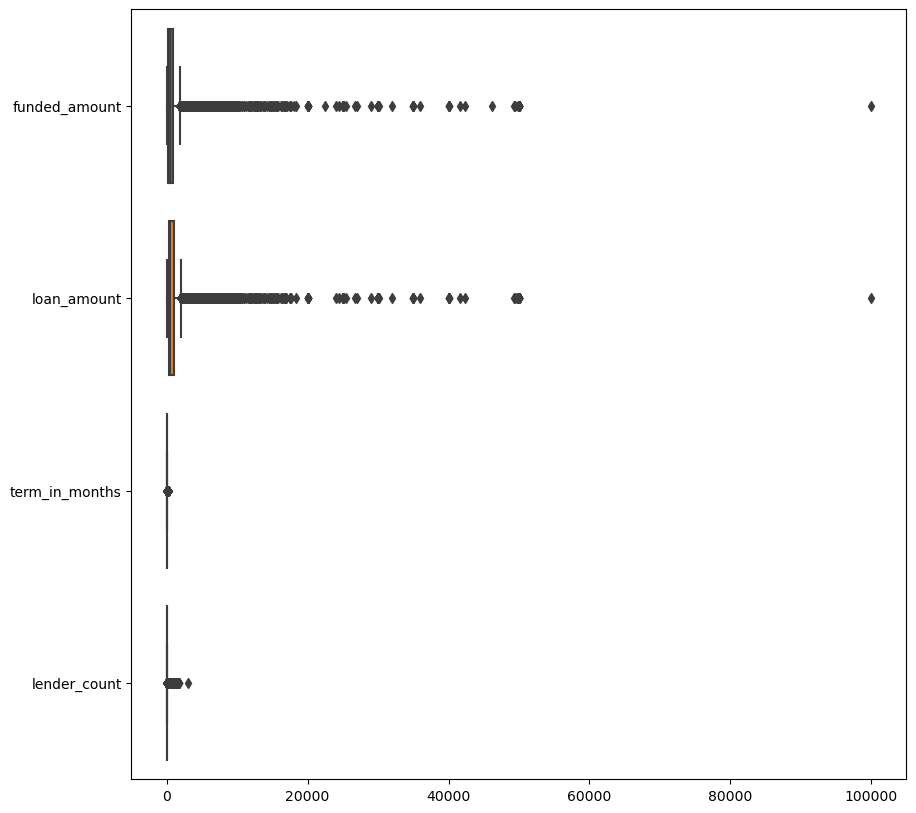

In [45]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, orient='h',)
plt.show()

Es gibt viele extreme Werte in den Daten und Boxplot spigelt die Situation nicht gut wider, aber da die Projekte ganz unterschiedlich sind, betrachten wir die Extremwerte nicht als falsche Daten und werden sie auch für die Analyse verwenden

### Datenaufbereitung. Spalte borrower_genders

Mit der **unique Methode** haben wir herausgefunden, dass die Projektteilehmer nicht nur 'female' oder 'male' sind, sondern auch eine Gruppe von Menschen. Für Unternehmen wird es interessant sein, ihre Zielgruppe zu kennen, deswegen  erstellen wir  eine neue Spalte für Geschlecht. 

In [46]:
# Funktion zur Ermittlung des Geschlechts für jede Zeile
def check_gender(row):
    genders = row['borrower_genders'].split(', ')
    if 'female' in genders and 'male' not in genders:
        return 'female'
    elif 'male' in genders and 'female' not in genders:
        return 'male'
    else:
        return 'mixed'

# Eine neue Spalte 'Geschlecht' erstellen, die das Geschlecht für jede Zeile angibt
df['gender'] = df.apply(check_gender, axis=1)




In [47]:
df['gender'].value_counts()

female    492302
male      138523
mixed      40380
Name: gender, dtype: int64

Es kann auch nutzlich sein zu wissen, wie viele Menschen auf der Plattfrom nach Investoren suchen. Wir erstellen eine neue Spalte für die Anzahl der Teilnehmer. 

In [48]:
# Erstellen neue Spalte  mit lambda 
df['borrower_gender_count'] = df['borrower_genders'].apply(lambda x: len(x.split(', ')))

In der Spalte borrower_genders erstellen wir eine  separate Kategorie  für  Gruppe von Menschen.

In [49]:
# Erstellen neue Kategorie group mit list copmpehension 

df['borrower_genders'] = [elem if elem in ['female','male'] else 'group' 
                                     for elem in df['borrower_genders'] ]

In [50]:
# Unique Werte

df['borrower_genders'].unique()

array(['female', 'group', 'male'], dtype=object)

In [51]:
df['borrower_genders'].value_counts()

female    430723
male      134710
group     105772
Name: borrower_genders, dtype: int64

In [52]:
df.head(10)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,gender,borrower_gender_count
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,PKR,12,12,female,irregular,female,1
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,PKR,11,14,group,irregular,female,2
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,INR,43,6,female,bullet,female,1
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,PKR,11,8,female,irregular,female,1
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,PKR,14,16,female,monthly,female,1
5,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,KES,4,6,female,irregular,female,1
6,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,INR,43,8,female,bullet,female,1
7,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,PKR,14,8,female,monthly,female,1
8,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,PKR,14,19,female,monthly,female,1
9,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,PKR,11,24,female,irregular,female,1


**Ergebnis**

In der Spalte **borrower_genders** haben wir drei Werte: female, male und group. In der Spalte **gender** kann man sehen, welches geschlecht die Teilnehmer der Gruppe haben. In der Spalte **borrower_gender_count** - Anzahl der Teilnehmer pro Projekt.

## Kennzahlen

In [53]:
# Schauen wir noch mal die Statistik

df.describe()

,funded_amount,loan_amount,term_in_months,lender_count,borrower_gender_count
count,671205.000000,671205.000000,671205.000000,671205.000000,671205.000000
mean,785.995061,842.397107,13.739022,20.590922,2.011953
std,1130.398941,1198.660073,8.598919,28.459551,3.403832
min,0.000000,25.000000,1.000000,0.000000,1.000000
25%,250.000000,275.000000,8.000000,7.000000,1.000000
50%,450.000000,500.000000,13.000000,13.000000,1.000000
75%,900.000000,1000.000000,14.000000,24.000000,1.000000
max,100000.000000,100000.000000,158.000000,2986.000000,50.000000


- Es gibt einen ausgezahlter Betrag in der Größe von 100000

**Das teuerste Projekt**

In [54]:
df[df.funded_amount == 100000]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,gender,borrower_gender_count
70499,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,USD,75,2986,female,irregular,female,1


- Das Projekt im Bereich der Landwirtchaft. Das Ziel dieses Projekts ist es, Arbeitplätze für Frauen und Farmer in Haiti zu schaffen.  
- Diese Daten können für Werbekampahnen verwendet werden. Dies macht die Plattform für Kreditnehmer attraktiv, da solche teuren Projekte ihre Investoren finden.

**Projekte unter 1000 USD**

In [55]:
# Projekte unter 1000 USD

df[(df['funded_amount'] < 1000) & (df['funded_amount'] != 0)]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,gender,borrower_gender_count
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,PKR,12,12,female,irregular,female,1
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,PKR,11,14,group,irregular,female,2
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,INR,43,6,female,bullet,female,1
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,PKR,11,8,female,irregular,female,1
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,PKR,14,16,female,monthly,female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671173,75.0,125.0,Livestock,Agriculture,Pretend the flagged issue was addressed by KC.,MX,Mexico,MXN,13,3,group,monthly,female,2
671175,75.0,125.0,Livestock,Agriculture,Pretend the flagged issue was addressed by KC.,MX,Mexico,MXN,13,3,group,monthly,female,2
671177,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,KES,13,1,female,monthly,female,1
671186,25.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,USD,13,1,female,monthly,female,1


- 516807 Projekte sind weniger als 1000 USD - 77% von allen Projekten


**Projekte ohne Investitionen**

In [56]:
# Projekte ohne Investitionen
df_failed = df[df.funded_amount == 0]
df_failed.shape

(3383, 14)

In [57]:
df_failed_count = df_failed.groupby(['sector', 'country']).size().reset_index(name='count').sort_values(by = 'count', ascending = False)
df_failed_count.head(10)

,sector,country,count
235,Services,United States,329
15,Agriculture,Kenya,172
100,Food,Kenya,167
207,Retail,United States,134
20,Agriculture,Nigeria,125
120,Food,United States,121
187,Retail,Kenya,107
227,Services,Pakistan,95
4,Agriculture,Cambodia,73
92,Food,El Salvador,70


In [58]:
# Daten nach Sektor gruppieren und die Summe von  loan_amount berechnen
df_failed_sum = df_failed.groupby(['sector', 'country'])['loan_amount'].sum().reset_index().sort_values(by = 'loan_amount', ascending = False)
df_failed_sum.head(10)

,sector,country,loan_amount
235,Services,United States,1119275.0
120,Food,United States,543575.0
207,Retail,United States,539100.0
62,Clothing,United States,219375.0
29,Agriculture,United States,193725.0
85,Entertainment,United States,154100.0
81,Education,United States,106500.0
253,Transportation,United States,88250.0
4,Agriculture,Cambodia,81650.0
37,Arts,United States,80050.0


In [59]:
#Prozentsatz der Gesamtzahl der Projekte
df_failed_sum_percent = df_failed['funded_amount'].count() / df['funded_amount'].count() *100
print(f'{round(df_failed_sum_percent,1)}%')

0.5%


- nur 3383 Projekte haben keine Kreditgeber gefunden. 
- 329 Projekte in verschieden Branchen in USA wurden nicht investiert.(Gibt es einen Grund?) 
- Anzahl der Projekte ohne Investitionen 0.5%


**Wie viele Kreditnehmer haben die Plattform benutzt?**

In [60]:
df['borrower_gender_count'].sum()

1350433

**Wie viele Kreditgeber  haben die Plattform benutzt?**

In [61]:
df['lender_count'].sum()

13820730

**Gesamtfinanzierung**

In [62]:
df['funded_amount'].sum()

527563815.0

In [63]:
df_usa = df[(df['funded_amount'] == 0) & (df['country'] == 'United States')]
df_usa

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,gender,borrower_gender_count
4814,0.0,5000.0,Food Production/Sales,Food,grow and create new jobs in my company.,US,United States,USD,24,0,female,bullet,female,1
6784,0.0,10000.0,Cosmetics Sales,Retail,start a new stream of income by offering retai...,US,United States,USD,36,0,male,bullet,male,1
10735,0.0,5000.0,Services,Services,purchase new equipment and market to more pote...,US,United States,USD,24,0,male,bullet,male,1
12037,0.0,5000.0,Food Production/Sales,Food,purchase much needed packaging that is sustain...,US,United States,USD,24,0,male,bullet,male,1
13542,0.0,1500.0,Crafts,Arts,"increase my inventory of handmade candles, dri...",US,United States,USD,12,0,male,bullet,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665362,0.0,8000.0,Retail,Retail,"us resurface our floor, which is worn out from...",US,United States,USD,36,0,male,bullet,male,1
666552,0.0,5000.0,Child Care,Services,hire new staff in our expansion of serving 40 ...,US,United States,USD,24,0,male,bullet,male,1
666606,0.0,10000.0,Restaurant,Food,with the opening of my second coffee shop loca...,US,United States,USD,36,0,male,bullet,male,1
667925,0.0,1000.0,Services,Services,"with marketing, hiring an assistant, updating ...",US,United States,USD,12,0,female,bullet,female,1


In [64]:
df.head(5)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,borrower_genders,repayment_interval,gender,borrower_gender_count
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,PKR,12,12,female,irregular,female,1
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,PKR,11,14,group,irregular,female,2
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,INR,43,6,female,bullet,female,1
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,PKR,11,8,female,irregular,female,1
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,PKR,14,16,female,monthly,female,1


In [65]:
# unsere df als pickle zwischenspeichern, um diese für die visualiserung zu nutzen

df.to_pickle('df.pkl')